# Sentiment Analysis: Predicting sentiment of COVID-19 Tweets

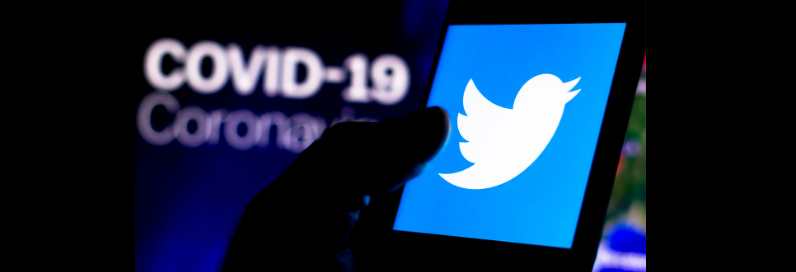

**Problem Description:**

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns.

**Notebook Context:**

This notebook aims at building at text classification engine from the content of Coronavirus Tweets NLP - Text Classifiation dataset that contains around 41157 reviews. Basically, the engine works as follows: after user has provided with tweet, the engine cleans the data and tries to classify the tweet as positive, negative or neutral.

## 1. Importing Libraries and Loading Dataset

In [1]:
# To just ignore all the warnings.
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [2]:
# checking GPU availability for computational power 
# 0 = GPU Active 
# 1 = GPU inactive
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Basic Dependencies
import pandas as pd
import numpy as np
# For basic Ploting graph and charts
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
# For more plotting options
import seaborn as sns
plt.style.use('seaborn-darkgrid')
# Using Plotly instance methods to plot your data on interactive maps and charts
import plotly.express as px
import plotly.graph_objects as go
# wordclound
from PIL import Image # Python Imaging Library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# For machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import WhitespaceTokenizer
from collections import Counter
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
import io # allows us to manage the file-related input and output operations
import re # regular expression
import time
import math
import string # create a string template for simpler string substitutions
import urllib #Python module for fetching URLs
import requests # The requests module allows you to send HTTP requests using Python
import neattext.functions as nfx # NLP package for cleaning text.

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [4]:
# Loading up the data into a DataFrame
tweet_data = pd.read_csv('Coronavirus Tweets.csv', encoding="ISO-8859-1")

# Shape of data.
print(f'Diamentions: {tweet_data.shape[0]} x {tweet_data.shape[1]}')

Diamentions: 41157 x 6


In [5]:
# Names Of columns in our dataset
tweet_data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [6]:
# Display the first 5 rows of the tweet data
tweet_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
# Display information about the tweet_data DataFrame
# This provides an overview of the dataset's structure and column information
# Useful for understanding the data before performing any analysis or processing

tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [26]:
# Duplicate rows
tweet_data[tweet_data.duplicated()]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment


In [8]:
# Display the count of tweets based on tweet timing
tweet_data.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

# 2. Data Preprocessing


In [9]:
# checking Null values
nulls = tweet_data.isna().sum().sort_values(ascending=False)
total_elements = tweet_data.shape[0]
null_percentage = (tweet_data.isnull().sum()/total_elements).sort_values(ascending=False)

null_table = pd.concat([nulls, null_percentage], axis=1, keys=['Total_Missing', 'Missing%'])
null_table.reset_index(inplace=True)
null_table.rename(columns= {"index": " Column_Name"})
print(null_table)

           index  Total_Missing  Missing%
0       Location           8590  0.208713
1       UserName              0  0.000000
2     ScreenName              0  0.000000
3        TweetAt              0  0.000000
4  OriginalTweet              0  0.000000
5      Sentiment              0  0.000000


In [10]:
# Check for missing values in the tweet_data DataFrame
# and display the count of missing values for each column

tweet_data.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [11]:
# Sentiment Distribution
sentiment_counts = tweet_data['Sentiment'].value_counts()
sentiment_counts

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

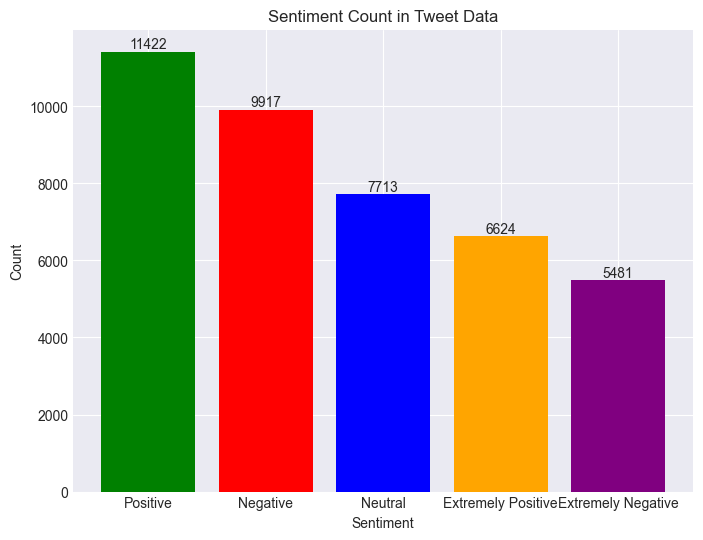

In [12]:
sentiment_counts = tweet_data['Sentiment'].value_counts()

colors = ['green', 'red', 'blue', 'orange', 'purple']  # Specify colors for each bar

plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)

# Add count values above the bars
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Count in Tweet Data')

plt.show()


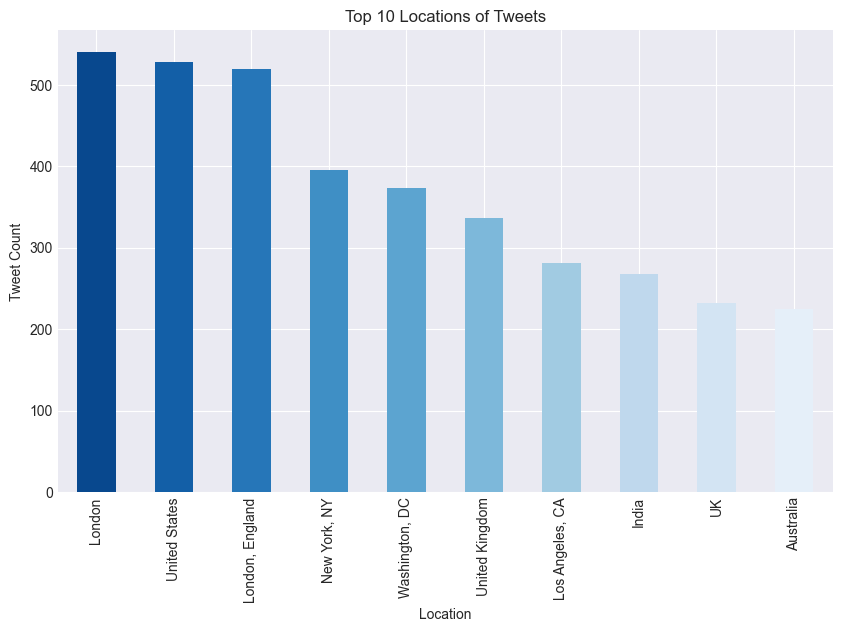

In [14]:
# Calculate the top 10 locations based on tweet count
top_10_locations = tweet_data['Location'].value_counts().head(10)

# Define colors for the bar graph based on count in each location
colors = sns.color_palette("Blues_r", len(top_10_locations))

# Create a bar plot for the top 10 locations
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color=colors)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Tweet Count')
plt.title('Top 10 Locations of Tweets')

plt.show()

In [15]:
tweet_data['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

# Locations with most number of Negative Tweets made

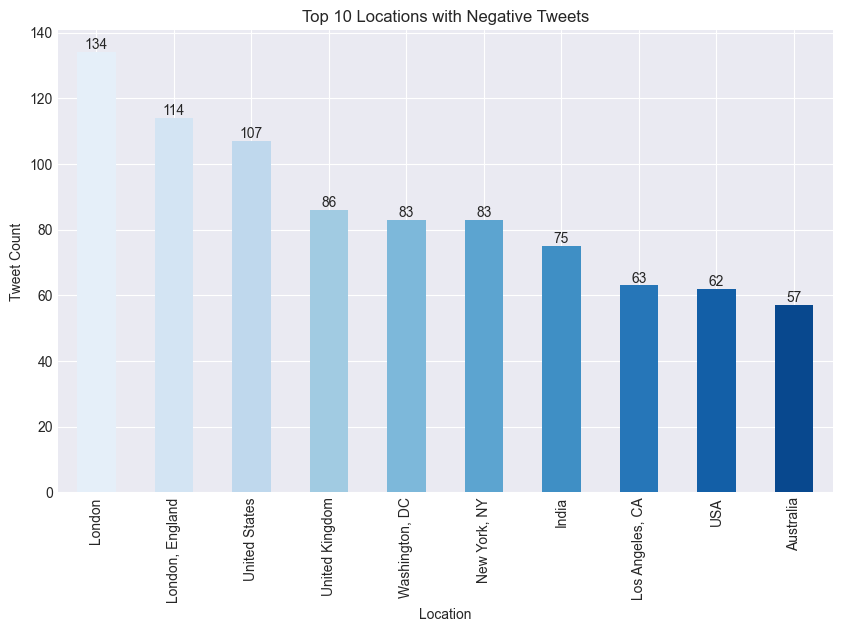

In [23]:
# Filter the data for negative tweets
negative_tweets = tweet_data[tweet_data['Sentiment'] == 'Negative']

# Calculate the counts for each location
location_counts = negative_tweets['Location'].value_counts()

# Select the top 10 locations with the highest counts
top_10_locations = location_counts.head(10)

# Create a color map based on the count of negative tweets in each location
color_map = sns.color_palette("Blues", len(top_10_locations))

# Create a bar plot for the top 10 locations with colors based on the count
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color=color_map)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Tweet Count')
plt.title('Top 10 Locations with Negative Tweets')

# Add data labels above each bar
for i, count in enumerate(top_10_locations):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


# Locations with most number of Positive Tweets made

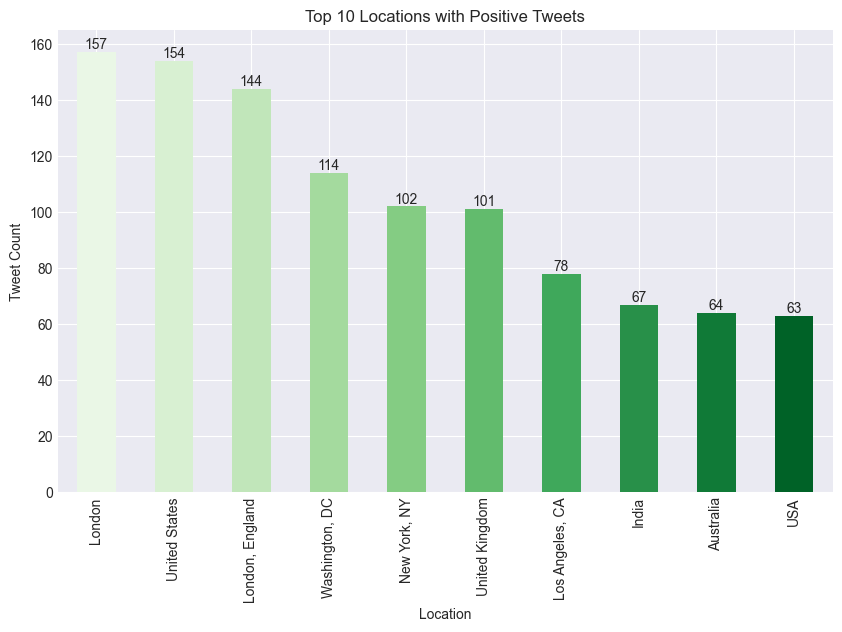

In [25]:
# Filter the data for positive tweets
positive_tweets = tweet_data[tweet_data['Sentiment'] == 'Positive']

# Calculate the counts for each location
location_counts = positive_tweets['Location'].value_counts()

# Select the top 10 locations with the highest counts
top_10_locations = location_counts.head(10)

# Create a color map based on the count of positive tweets in each location
color_map = sns.color_palette("Greens", len(top_10_locations))

# Create a bar plot for the top 10 locations with colors based on the count
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color=color_map)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Tweet Count')
plt.title('Top 10 Locations with Positive Tweets')

# Add data labels above each bar
for i, count in enumerate(top_10_locations):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


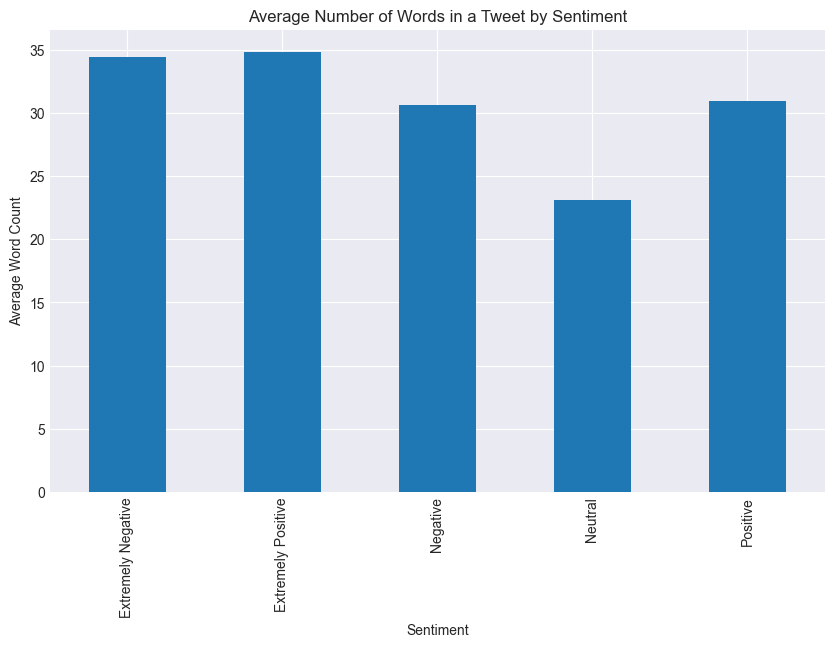

In [28]:
# Calculate the number of words in each tweet
tweet_data['WordCount'] = tweet_data['OriginalTweet'].str.split().str.len()

# Group the data by sentiment and calculate the average word count
wordcount_by_sentiment = tweet_data.groupby('Sentiment')['WordCount'].mean()

# Plot the graph
plt.figure(figsize=(10, 6))
wordcount_by_sentiment.plot(kind='bar')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Average Word Count')
plt.title('Average Number of Words in a Tweet by Sentiment')

plt.show()
